<a href="https://colab.research.google.com/github/Gaurav0771/Ml-Tutorials/blob/main/tutorial7PrincipalComponentAnanlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/cars_24_combined.csv')  # Replace with your dataset file path

# Handle missing values by imputing with the mean
df.fillna(df.mean(), inplace=True)

# Select relevant columns for PCA
X = df[['Year', 'Distance', 'Owner', 'Price']]  # Adjust columns as needed


<ipython-input-1-60ae5d9263cd>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [2]:
from sklearn.preprocessing import StandardScaler

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


In [3]:
import numpy as np

cov_matrix = np.cov(X_std, rowvar=False)


In [4]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


In [5]:
# Sort the eigenvalues in decreasing order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Select the top k eigenvectors
k = 2  # Number of principal components
principal_components = sorted_eigenvectors[:, :k]


In [6]:
X_pca = X_std.dot(principal_components)


In [7]:
explained_variance_ratio = sorted_eigenvalues / sum(sorted_eigenvalues)


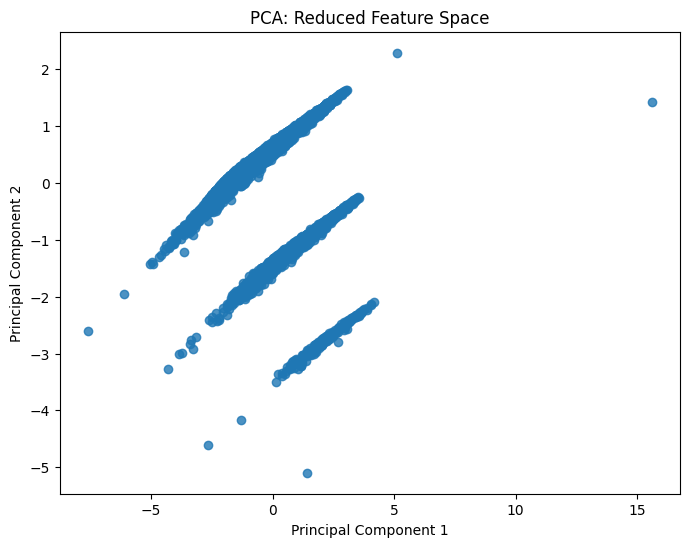

In [9]:
# Visualize data in the reduced feature space
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)
plt.title('PCA: Reduced Feature Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()